In [76]:
import pandas as pd
cars = pd.read_csv('cars_cleaned.csv')
cars.columns

Index(['condition', 'drive', 'fuel', 'location', 'odometer', 'paint color',
       'price', 'sale type', 'title status', 'transmission', 'type',
       'cylinders', 'size', 'latitude', 'longitude', 'location_simple', 'year',
       'age', 'make_', 'model', 'pos_words', 'neg_words', 'low_text', 'model0',
       'model1', 'model2'],
      dtype='object')

In [77]:
cars.head()

,condition,drive,fuel,location,odometer,paint color,price,sale type,title status,transmission,...,year,age,make_,model,pos_words,neg_words,low_text,model0,model1,model2
0,good,4wd,gas,vancouver,281000,white,5500,owner,rebuilt,automatic,...,2007,14,bmw,x3,False,False,False,x3,None,None
1,unknown,unknown,gas,vancouver,140000,unknown,600,owner,clean,automatic,...,1984,37,honda,accord,False,False,False,accord,None,None
2,excellent,rwd,diesel,vancouver,110000,white,67000,owner,clean,automatic,...,2008,13,gmc,c7500,False,False,False,c7500,None,None
3,unknown,unknown,gas,vancouver,243000,unknown,4000,owner,clean,automatic,...,2003,18,acura,rsx,True,False,False,rsx,None,None
4,salvage,unknown,gas,vancouver,225000,black,1500,owner,salvage,automatic,...,2005,16,acura,rsx,False,False,False,rsx,None,None


In [81]:
fill_mode_cols = ['type', 'fuel', 'drive'] #for these columns we, will replace 'unknown' with the mode of that make of vehicle

for col in fill_mode_cols:
    modes = cars.groupby('model0')[col].agg([pd.Series.mode])
    cars[col] = cars.apply(lambda x: modes.loc[x['model0']].values[0] if x[col]==None else x[col], axis=1)

cars

,condition,drive,fuel,location,odometer,paint color,price,sale type,title status,transmission,...,year,age,make_,model,pos_words,neg_words,low_text,model0,model1,model2
0,good,4wd,gas,vancouver,281000,white,5500,owner,rebuilt,automatic,...,2007,14,bmw,x3,False,False,False,x3,None,None
1,unknown,unknown,gas,vancouver,140000,unknown,600,owner,clean,automatic,...,1984,37,honda,accord,False,False,False,accord,None,None
2,excellent,rwd,diesel,vancouver,110000,white,67000,owner,clean,automatic,...,2008,13,gmc,c7500,False,False,False,c7500,None,None
3,unknown,unknown,gas,vancouver,243000,unknown,4000,owner,clean,automatic,...,2003,18,acura,rsx,True,False,False,rsx,None,None
4,salvage,unknown,gas,vancouver,225000,black,1500,owner,salvage,automatic,...,2005,16,acura,rsx,False,False,False,rsx,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37336,excellent,fwd,gas,port coquitlam,28356,black,28995,dealer,clean,automatic,...,2020,1,mazda,mazda6,False,False,False,mazda6,None,None
37337,excellent,fwd,gas,port coquitlam,23820,black,27995,dealer,clean,automatic,...,2020,1,toyota,camry,False,False,False,camry,None,None
37338,excellent,4wd,gas,port coquitlam,129449,white,29800,dealer,clean,automatic,...,2016,5,ford,f-150,False,False,False,f-150,None,None
37339,excellent,4wd,gas,port coquitlam,31512,silver,28995,dealer,clean,automatic,...,2020,1,ford,escape,False,False,False,escape,None,None


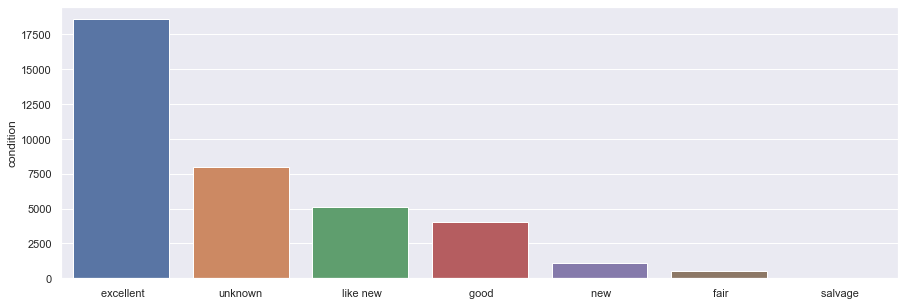

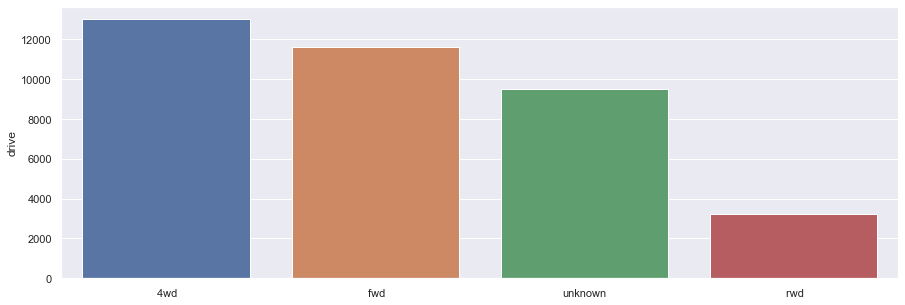

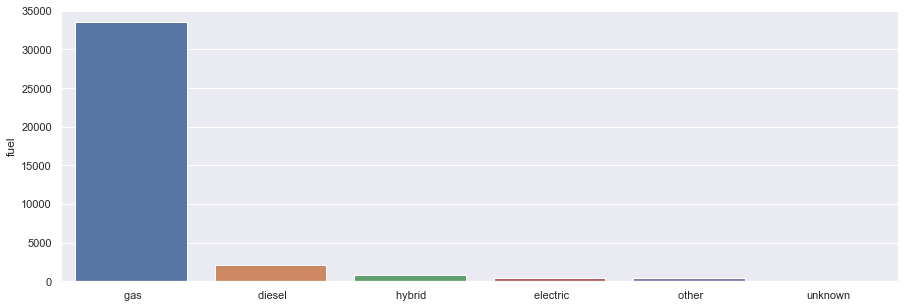

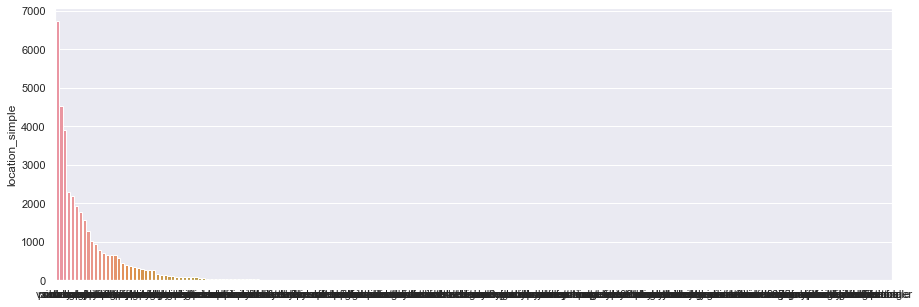

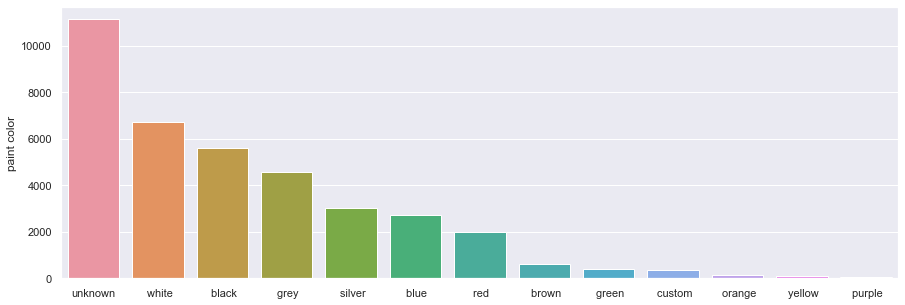

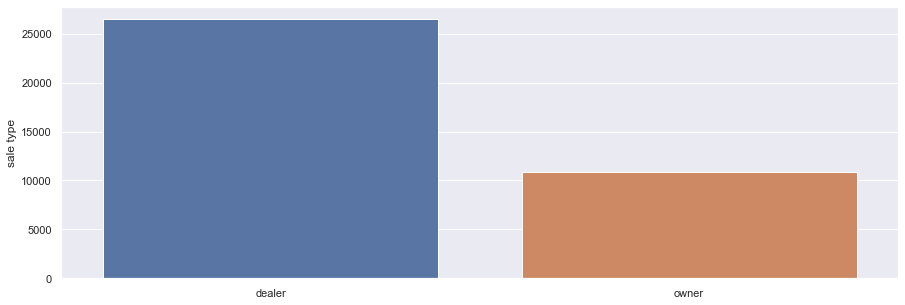

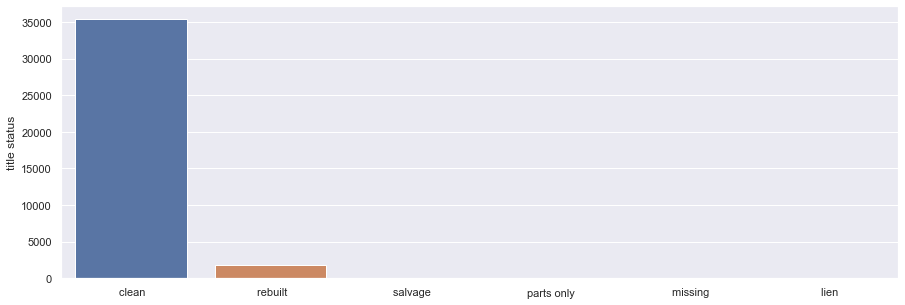

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,5)})

for col in ['condition', 'drive', 'fuel', 'location_simple', 'paint color', 'sale type', 'title status', 'transmission', 'type', 
            'cylinders', 'size', 'year']:
    dat = cars[col].value_counts()
    sns.barplot(x = dat.index, y = dat)
    plt.show()

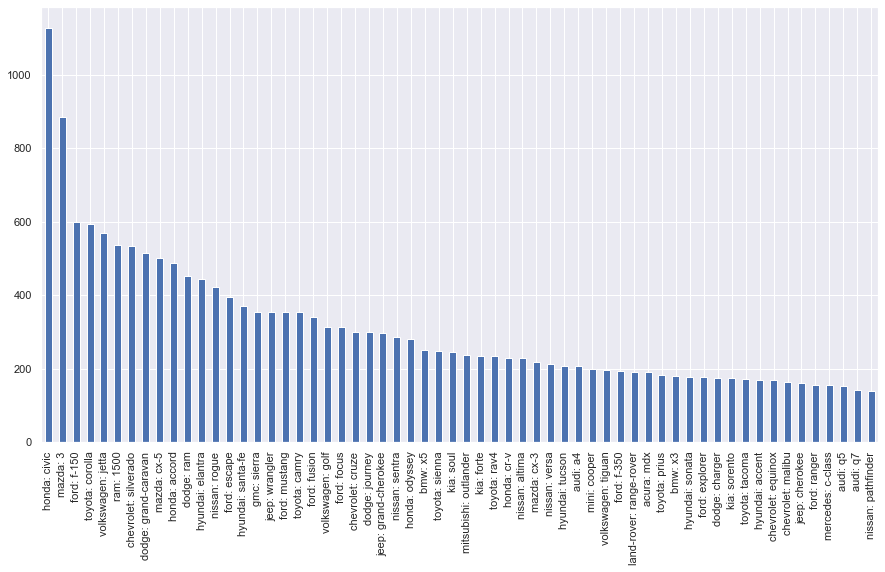

In [4]:
#column with the make and model in one (for plotting)
cars['make_model0'] = cars['make_'] + ': ' + cars['model0']
#plot 60 most popular cars
fig = cars.make_model0.value_counts()[:60].plot.bar(figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='make_model0'>

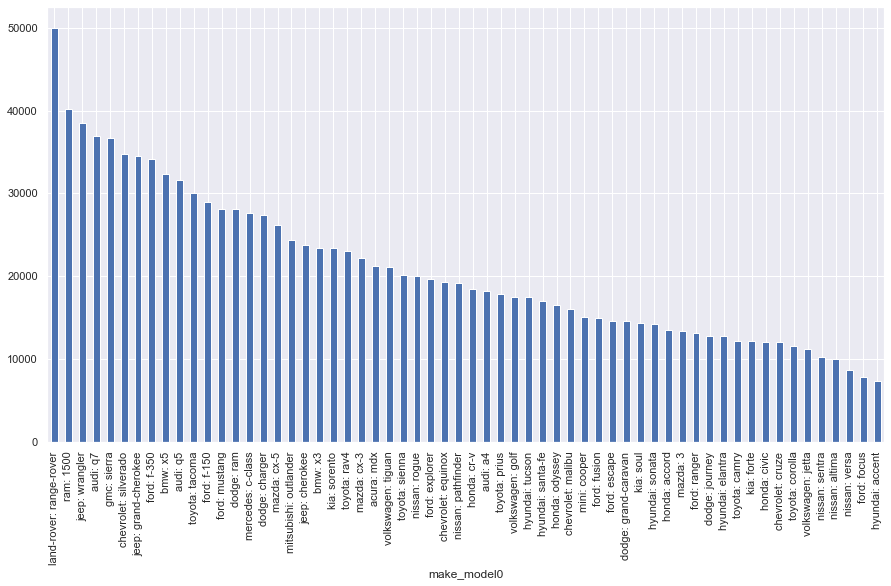

In [5]:
cars = cars.drop(cars[cars.price>500000].index, axis=0) #drop the few cars with very high price
com_cars = cars.make_model0.value_counts()[:60].index

#plot the average prices of the 60 most popular cars
com_price = cars[cars.make_model0.isin(com_cars)].groupby(['make_model0']).price.mean().sort_values(ascending=False)
com_price.plot.bar(figsize=(15,8))

<AxesSubplot:>

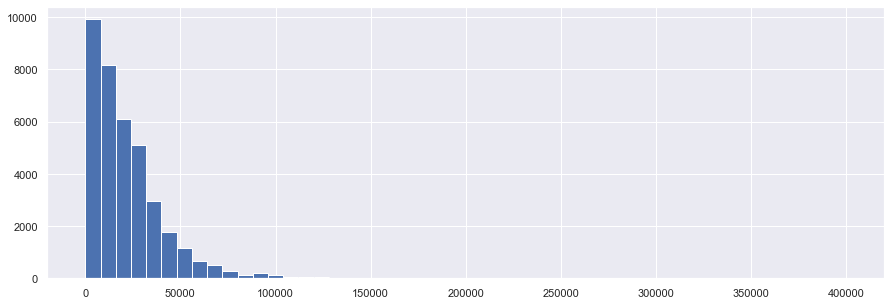

In [6]:
cars.price.hist(bins=50)

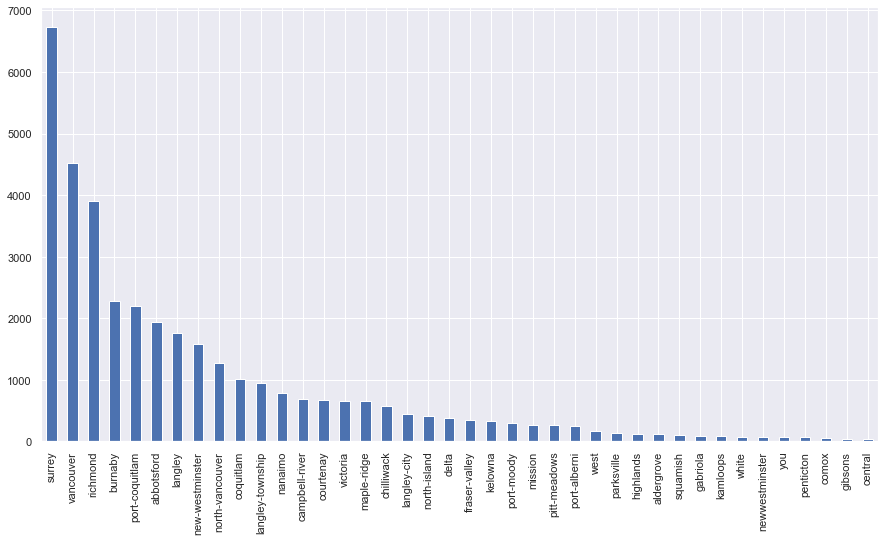

In [7]:
fig = cars.location_simple.value_counts()[0:40].plot.bar(figsize=(15,8))
plt.show()

In [24]:
cars[cars['type']==' truck'].model0.value_counts()[0:50
                                                  ]

f-150        225
silverado    167
ram          156
1500         143
sierra       109
ranger        64
f-350         52
tacoma        49
f-250         31
3500          30
colorado      27
unknown       24
tundra        21
canyon        19
f550          19
f450          14
None          11
super          9
dakota         8
b2300          6
explorer       6
m2             6
titan          6
ridgeline      6
yukon          5
high           4
2500           4
gladiator      4
sr5            4
cascadia       4
fuso           4
frontier       4
e350           3
tiguan         3
terrastar      3
f-550          3
f-450          3
f750           3
388            3
b3000          3
avalanche      3
access         3
4x4            3
4300           3
econoline      3
columbia       3
b4000          3
s10            3
f100           3
f              3
Name: model0, dtype: int64

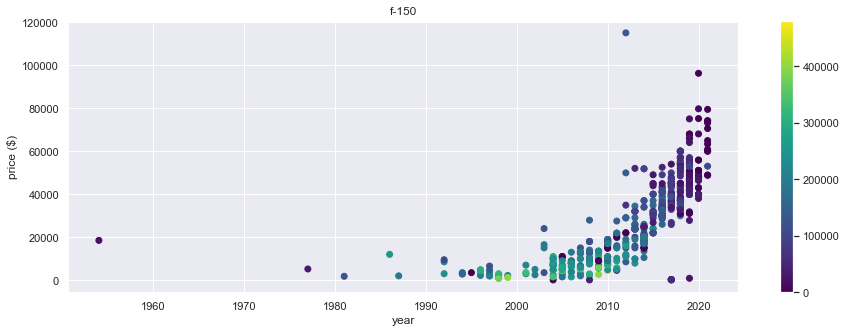

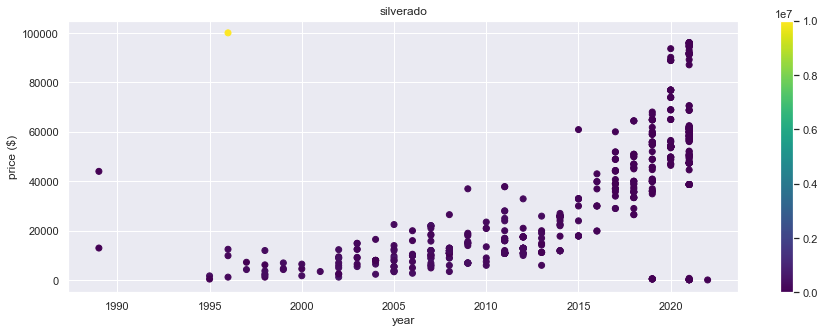

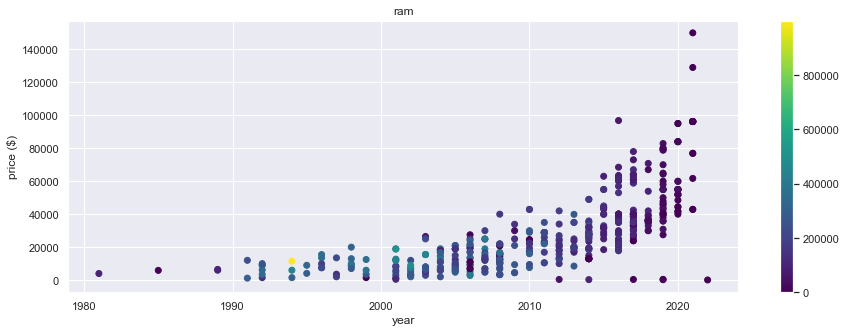

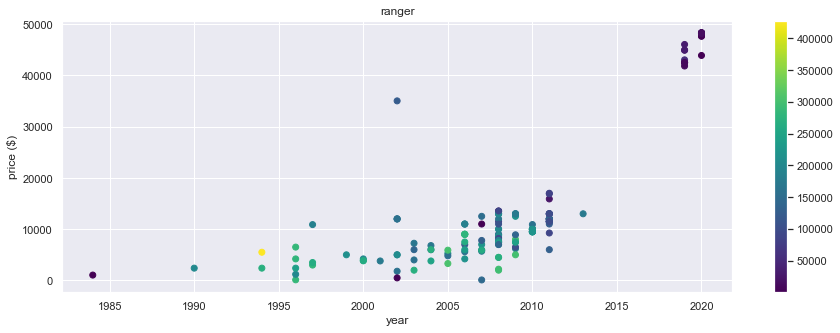

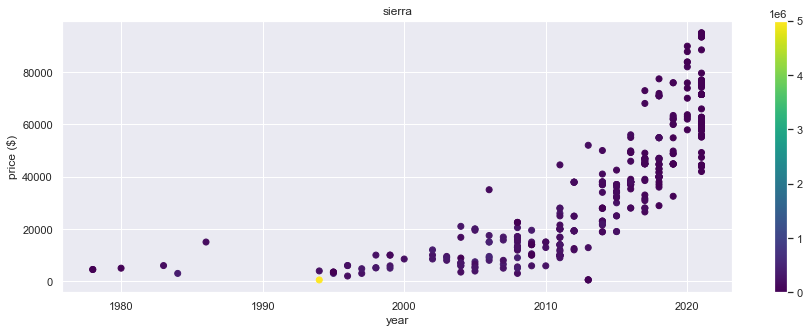

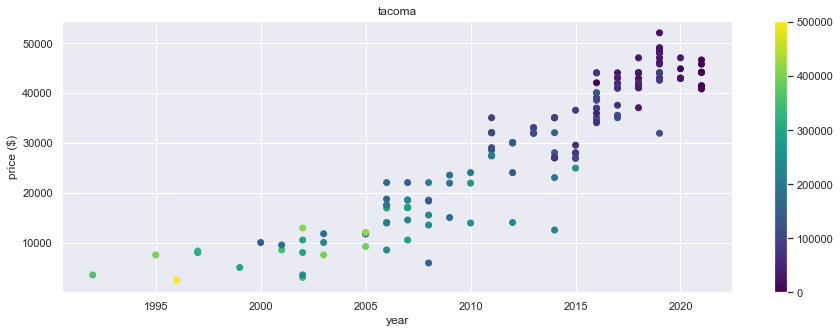

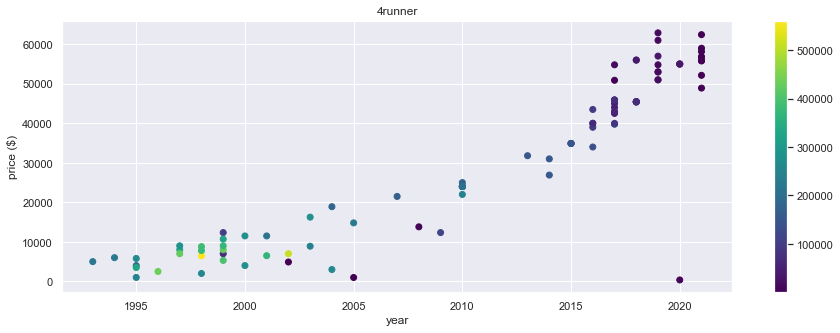

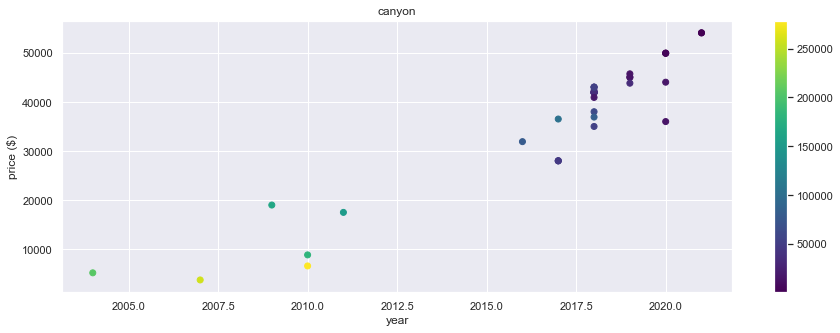

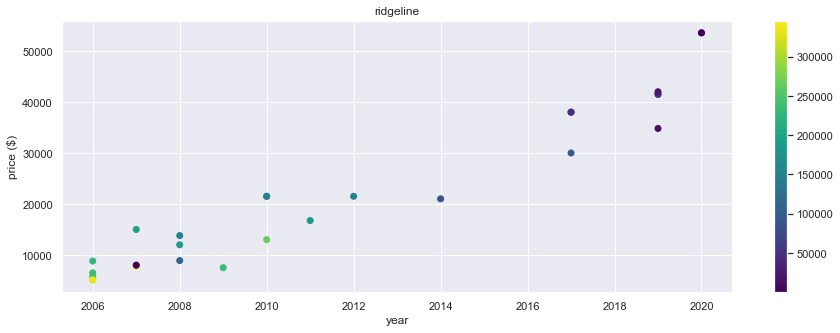

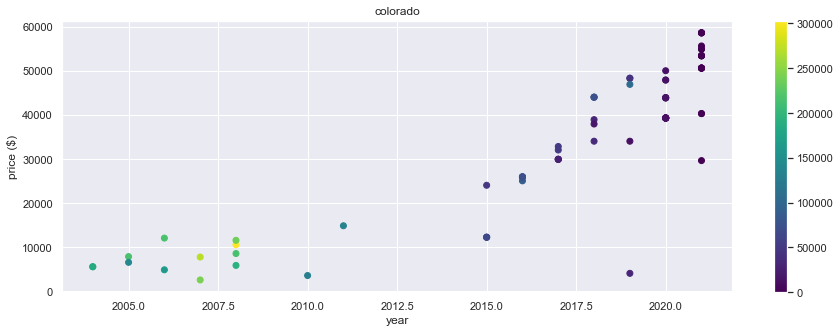

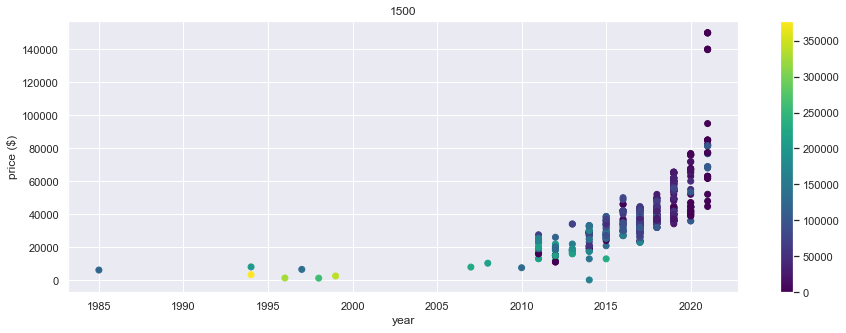

In [10]:
names = ['f-150', 'silverado', 'ram', 'ranger', 'sierra', 'tacoma', '4runner', 'canyon', 'ridgeline', 'colorado', '1500']
for name in names:
    df = cars[cars['model0']==name]

    trucks = plt.scatter(x = df['year'], y = df['price'], c=df['odometer'], cmap='viridis')
    plt.colorbar(trucks)
    plt.xlabel('year')
    plt.ylabel('price ($)')
    plt.title(name)
    plt.show()